In [1]:
import psycopg2

In [2]:
connection = psycopg2.connect("user=postgres", password="*******",
                              host="127.0.0.1", port="5432", database="JAP-Ecomerce")
cur = connection.cursor()

In [3]:
cur.execute("SELECT version();")
record = cur.fetchone()
print("You are connected to - ", record)

You are connected to -  ('PostgreSQL 15.2, compiled by Visual C++ build 1914, 64-bit',)


In [4]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall():
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_payments_dataset',)
('order_review_dataset',)
('order_items_dataset',)
('order_dataset',)
('product_dataset',)
('seller_dataset',)


In [5]:
connection = psycopg2.connect(user="postgres", password="29qwertyus",
                              host="127.0.0.1", port="5432", database="JAP-Ecomerce")
cur = connection.cursor()
cur.execute("WITH rjc AS (SELECT Year, FLOOR(AVG(Active_customer)) AS average_customer FROM (SELECT EXTRACT(YEAR FROM od.order_purchase_timestamp) AS Year, EXTRACT(MONTH FROM od.order_purchase_timestamp) AS Month, COUNT(DISTINCT cd.customer_id) AS Active_Customer FROM order_dataset od JOIN customers_dataset cd ON od.customer_id = cd.customer_id GROUP BY 1, 2 ORDER BY 1, 2) tmp GROUP BY 1), jcb AS (SELECT Year, COUNT(customer_unique_id) AS total_purchases FROM (SELECT cd.customer_unique_id, EXTRACT(YEAR FROM MIN(od.order_purchase_timestamp)) AS Year FROM order_dataset od JOIN customers_dataset cd ON od.customer_id = cd.customer_id GROUP BY 1) tmp GROUP BY 1), jcp AS (SELECT Year, COUNT(customer_unique_id) AS Total FROM (SELECT EXTRACT(YEAR FROM od.order_purchase_timestamp) AS Year, cd.customer_unique_id, COUNT(od.order_id) AS repeat_order FROM order_dataset od JOIN customers_dataset cd ON od.customer_id = cd.customer_id GROUP BY 1, 2 HAVING COUNT(od.order_id) > 1) tmp GROUP BY 1), rjo AS (SELECT Year, AVG(jumlah_order) AS avg_order FROM (SELECT EXTRACT(YEAR FROM od.order_purchase_timestamp) AS Year, COUNT(od.order_id) AS jumlah_order, cd.customer_unique_id FROM order_dataset od JOIN customers_dataset cd ON od.customer_id = cd.customer_id GROUP BY 1, 3 ORDER BY 1, 3) tmp GROUP BY 1) SELECT rjc.Year AS Year, rjc.average_customer AS Monthly_Active_User, jcb.total_purchases AS Customer_Baru_Pertahun, jcp.Total AS Total_Repeat_Order_pertahun, rjo.avg_order AS Frekuensi_Order_Pertahun FROM rjc JOIN jcb ON rjc.year = jcb.year JOIN jcp ON jcb.year = jcp.year JOIN rjo ON jcp.year = rjo.year;")


hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.DataFrame(hasil, columns=kolom)  # Menyertakan daftar nama kolom saat membuat DataFrame
df.head()

,year,monthly_active_user,customer_baru_pertahun,total_repeat_order_pertahun,frekuensi_order_pertahun
0,2016,109,326,3,1.0092024539877301
1,2017,3758,43708,1256,1.03175256788598357468
2,2018,5401,52062,1167,1.02392462416349125102


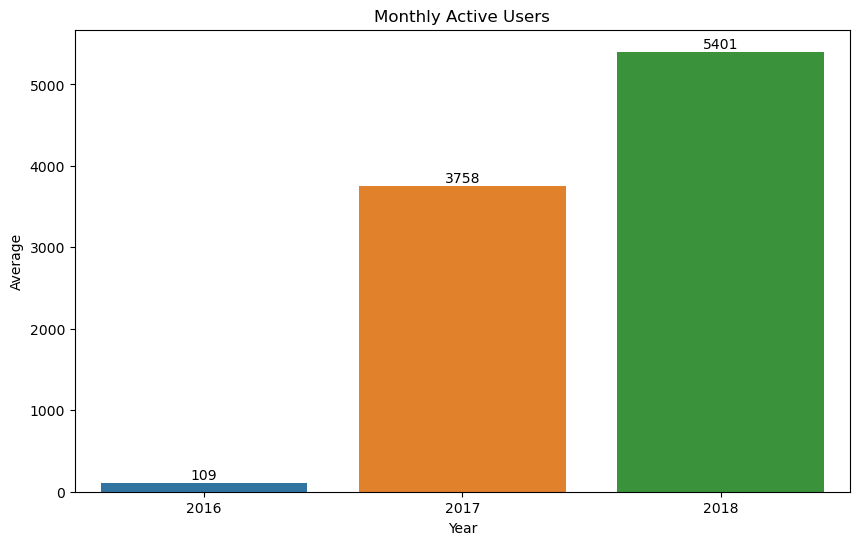

In [14]:
# Data
years = df['year']
monthly_active_users = df['monthly_active_user']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=monthly_active_users)
plt.title('Monthly Active Users')
plt.xlabel('Year')
plt.ylabel('Average')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, monthly_active_users[i], str(monthly_active_users[i]), ha='center', va='bottom')

plt.show()


**Tren Pertumbuhan Pengguna:**<br>
Jumlah pengguna aktif setiap bulan mengalami peningkatan dari tahun 2016 hingga 2018. Pada tahun 2016, terdapat 109 pengguna aktif setiap bulan, sedangkan pada tahun 2018 jumlahnya telah meningkat menjadi 5,401.<br>
Pertumbuhan yang signifikan ini menunjukkan adanya minat yang meningkat terhadap platform atau layanan yang disediakan.


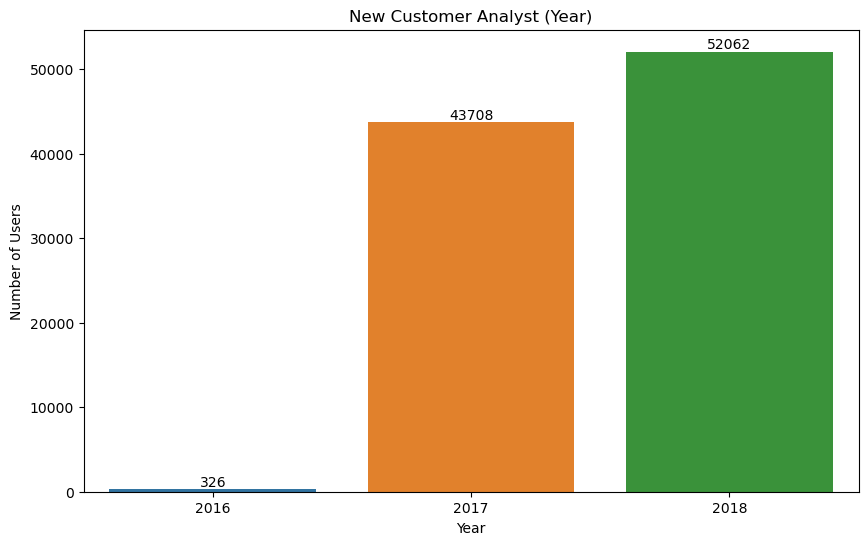

In [9]:
# Data
years = df['year']
customer_baru_pertahun = df['customer_baru_pertahun']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=customer_baru_pertahun)
plt.title('New Customer Analyst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, customer_baru_pertahun[i], str(customer_baru_pertahun[i]), ha='center', va='bottom')

plt.show()

**Peningkatan Pelanggan Baru:**<br>
Jumlah pelanggan baru yang bergabung dalam setahun juga mengalami peningkatan yang cukup signifikan dari tahun 2016 hingga 2018. Pada tahun 2016, terdapat 326 pelanggan baru, sementara pada tahun 2018 jumlahnya meningkat menjadi 52,062.<br>
Pertumbuhan ini menunjukkan adanya daya tarik yang kuat terhadap layanan yang ditawarkan, sehingga mampu menarik minat pelanggan baru.

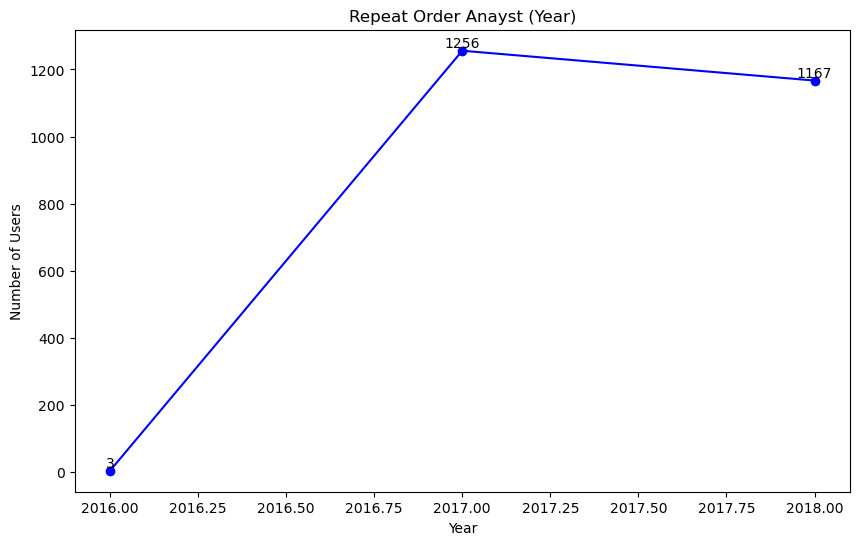

In [10]:
import matplotlib.pyplot as plt

# Data
years = df['year']
total_repeat_order_pertahun = df['total_repeat_order_pertahun']

# Plotting menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(years, total_repeat_order_pertahun, marker='o', linestyle='-', color='blue')

# Menambahkan nilai di atas titik pada garis
for i in range(len(years)):
    plt.text(years[i], total_repeat_order_pertahun[i], str(total_repeat_order_pertahun[i]), ha='center', va='bottom')

plt.title('Repeat Order Anayst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

plt.show()


**Stabilitas Pesanan yang Diulang:**<br>
Jumlah pesanan yang diulang dalam setahun relatif stabil dari tahun 2017 hingga 2018. Pada tahun 2017, terdapat 1,256 pesanan yang diulang, sedangkan pada tahun 2018 jumlahnya sedikit menurun menjadi 1,167.<br>
Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung melakukan pesanan ulang secara konsisten dari tahun ke tahun.

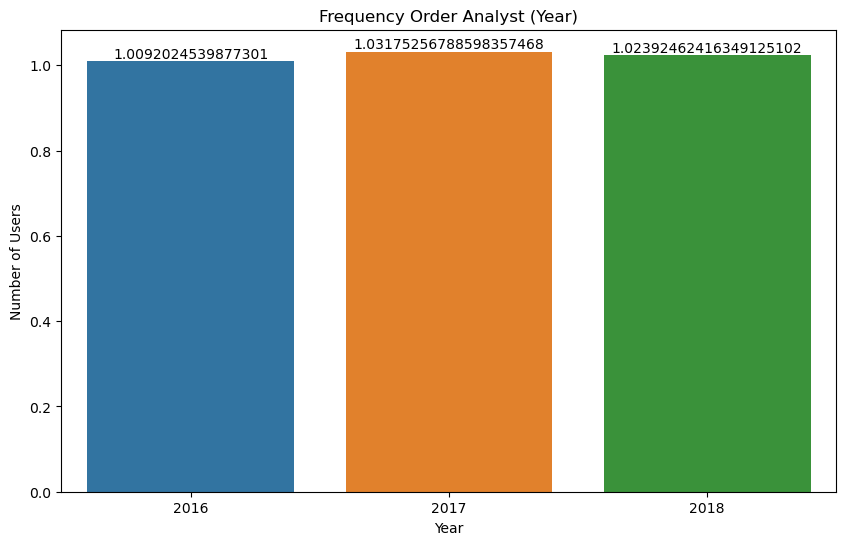

In [11]:
# Data
years = df['year']
frekuensi_order_pertahun = df['frekuensi_order_pertahun']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=frekuensi_order_pertahun)
plt.title('Frequency Order Analyst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, frekuensi_order_pertahun[i], str(frekuensi_order_pertahun[i]), ha='center', va='bottom')

plt.show()

**Konsistensi Frekuensi Pesanan:**<br>
Rata-rata frekuensi pesanan per pelanggan dalam setahun relatif stabil dari tahun 2016 hingga 2018. Rata-rata frekuensi pesanan per pelanggan berkisar antara 1.0092 hingga 1.0239.<br>
Hal ini menunjukkan bahwa pelanggan cenderung memiliki tingkat kepuasan atau kebutuhan yang konsisten dalam melakukan pesanan selama periode tersebut.